In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'April 2019'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':]
rep_2018 = report['2018':] # данные за 2018 год
rep_2019 = rep_2018.tail(13)
rep_2019

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-04-30     2359   2410         74   5   0     1     56     129       9
2018-05-31     2166   2355         65   4   0     1     42     131      12
2018-06-30     2361   2369         32   3   0     7     64     150      17
2018-07-31     2435   2513         69   1   0     7     51     184       7
2018-08-31     2637   2437         59   1   0     5    115     161       9
2018-09-30     2591   2343         85   4   0     2     84     134       9
2018-10-31     2746   2665         77   2   0     7     86     166      12
2018-11-30     2914   2444         61   3   0     5    162     182      24
2018-12-31     2948   2292         72   4   0     4    116     211      11
2019-01-31     3234   2440        122   4   0     8    113     166       9
2019-02-28     2925   2222        142   8   0     4     96     179      29
2019-03-31     2938   2223         86   2   0     9    149     190      28
2019-04-30     2994   2174         38   5   0     2     78     156      13

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2019-04-30       56    -49        -48   3   0    -7    -71     -34     -15

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

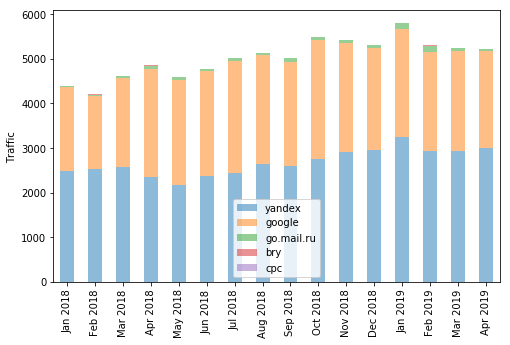

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2018.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2018.index]);

<h3>Линейная диаграмма изменений трафика</h3>

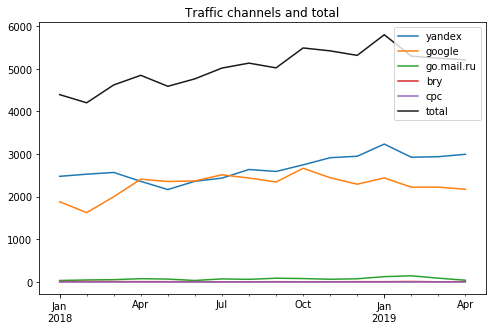

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2018.channels.plot(ax=ax);
rep_2018.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                                amazon      1
           1                        дверное полотно из сосны 210см      1
go.mail.ru 0                                             (not set)     38
google     0                                         дешевые двери    333
           1                                          двери дешево    277
           2                                       двери из дерева    105
           3                             np - /?cnt=catalog&r=2438     59
           4                             np - /?cnt=catalog&r=1428     50
           5                                      np - /?pid=pokaz     46
           6                                                np - /     37
           7                                         полотно двери     29
           8                                дверные полотна купить     25
           9                                         двери продажа     23
           10                             np - /?cnt=catalog&r=114     19
           11                                      недорогие двери     11
           12                                      двери комнатные     10
           13                                        двери полотно      9
           14                                       двери в ванную      8
           15                                      дверное полотно      8
           16                               дверное полотно дешево      7
           17                                     двери с коробкой      6
           18                                      полотна дверные      6
           19                                    современные двери      6
           20                             np - /?cnt=catalog&r=154      5
           21                                 дверное полотно цена      5
           22                            np - /?cnt=catalog&r=1432      4
           23                            np - /?cnt=catalog&r=1462      3
           24                            np - /?cnt=catalog&r=2078      3
           25                            np - /?cnt=catalog&r=3124      3
           26                                   np - /?pid=contact      3
...                                                            ...    ...
yandex     2561            где купить ручки на двери кухни и в ура      1
           2562                   где лучше сделать дверь на кухню      1
           2563       где лучше сделать дверь на кухню roomsty com      1
           2564  где лучше сделать дверь на кухню выбираем двер...      1
           2565  где лучше сделать дверь на кухню двери в интер...      1
           2566  где лучше сделать дверь на кухню двери в интер...      1
           2567  где лучше сделать дверь на кухню дверь на кухн...      1
           2568  где лучше сделать дверь на кухню какие двери л...      1
           2569  где лучше сделать дверь на кухню какую сдвижну...      1
           2570  где лучше сделать дверь на кухню кухонные межк...      1
           2571  где лучше сделать дверь на кухню практические ...      1
           2572  где лучше сделать дверь на кухню так как на дв...      1
           2573  где можна заказать дверь арк для кухни арка на...      1
           2574  где можна заказать дверь арк для кухни арка ро...      1
           2575  где можна заказать дверь арк для кухни з колек...      1
           2576  где можно заказать двери для кладовки в кварти...      1
           2577  где можно заказать полотно двери неокрашенное ...      1
           2578      где можно заказать полотно двери неокрашенные      1
           2579  где можно заказать самоклеющую пленку на дверц...      1
           2580  где можно купить двери гармошка деревянные нед...      1
           2581  Где можно купить двери гармошка деревянные нед...      1
           2582  где можно купить дверное полотно дверной блок ...      1
           2583  где можно купить дверное полотно корсика красн

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data.groupby(level=0, axis=0)[kw].apply(lambda x: x.xs(x.visit.idxmax())) #.xs(0, level=1)

,keyword,visit
bing,amazon,1
go.mail.ru,(not set),38
google,дешевые двери,333
rambler,купить дверное полотно в москве,1
yahoo,np - /?cnt=catalog&r=2372,1
yandex,дверь гармошка,55


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                                 amazon      1
           1         дверное полотно из сосны 210см      1
go.mail.ru 0                              (not set)     38
google     0                          дешевые двери    333
           1                           двери дешево    277
           2                        двери из дерева    105
           3              np - /?cnt=catalog&r=2438     59
           4              np - /?cnt=catalog&r=1428     50
rambler    0        купить дверное полотно в москве      1
yahoo      0              np - /?cnt=catalog&r=2372      1
           1              np - /?cnt=catalog&r=2438      1
yandex     4                         дверь гармошка     55
           0                              (not set)     48
           5                         двери гармошка     30
           6            дверь гармошка леруа мерлен     17
           7  двери гармошка в леруа мерлен каталог     16